In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

In [12]:
!pip install wordcloud
!pip install imblearn
!pip install matplotlib
!pip install seaborn

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 186.2 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.4 kB 186.2 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.4 kB 186.2 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.4 kB 186.2 kB/s eta 0:00:02
   ----- ---------------------------------- 41.0/301.4 kB 93.4 kB/s eta 0:00:03
   ----- ---------------------------------- 41.0/301.4 kB 93.4 kB/s eta 0:00:03
   ------- ------------------------------- 61.4/301.4 kB 125.8 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.4 kB 135.3 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.4 kB 135.3 kB/s eta 0

In [15]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [17]:
df.isnull().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [18]:
(df.isnull().sum()/len(df))*100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [30]:
def count_outlier_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    lower_bound = q1 - 1.5 *IQR
    upper_bound = q3 + 1.5 *IQR
    return ((data < lower_bound)| (data > upper_bound)).sum()
outlier_counts={}
for col in df.select_dtypes(include=['int64','float64']).columns:
    outlier_counts[col] = count_outlier_iqr(df[col])
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()),
                                 columns=['Column','Outlier Count'])
outlier_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,23
7,Age,16
8,Outcome,0


In [34]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

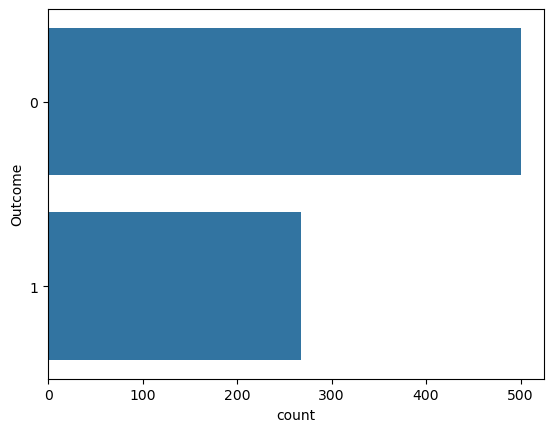

In [38]:
sns.countplot(data=df, y='Outcome')

Text(0.5, 0.98, 'Histograms of Pima Indian Diabetes Features')

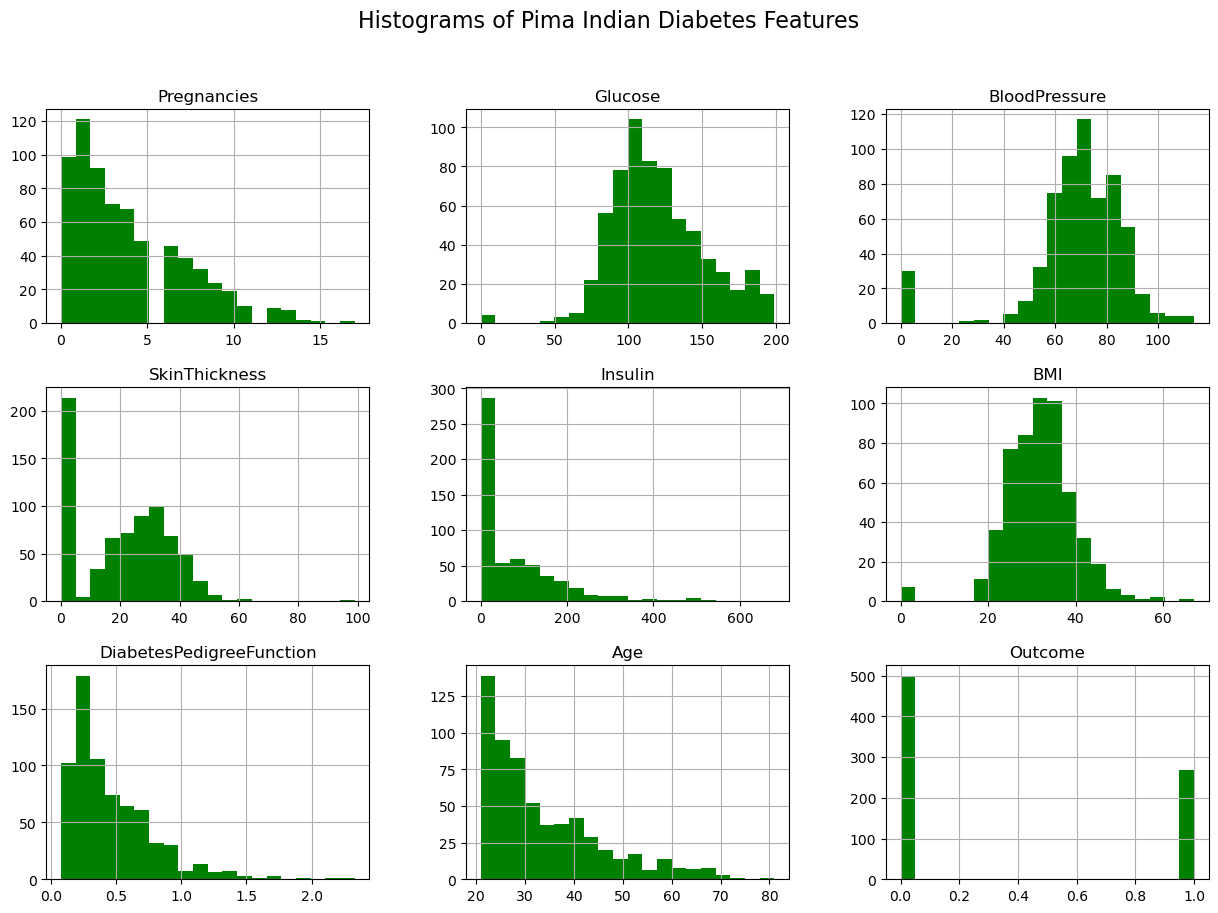

In [44]:
df.hist(bins=20,figsize=(15,10),layout=(3,3),
        color='green');
plt.suptitle('Histograms of Pima Indian Diabetes Features',fontsize=16)

In [2]:
def plot_boxplots(data):
    plt.figure(figsize=(15,20))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3,3,i+1)
        sns.boxplot(x='Outcome', y=column,data=data)
        plt.title(f'Box Plot of{column} by Diabetes Outcome')
    plt.tight_layout()
    plt.show()
plot_boxplots(df)

NameError: name 'df' is not defined

<Axes: >

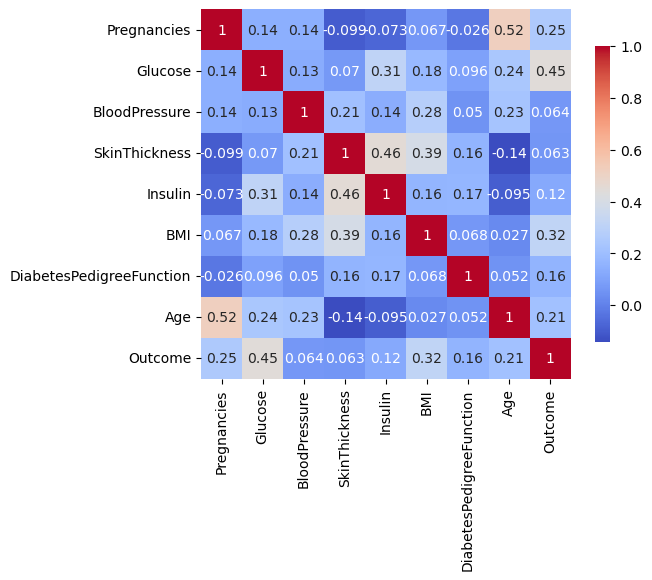

In [63]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',
            square=True, cbar_kws={"shrink":.8})

In [60]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


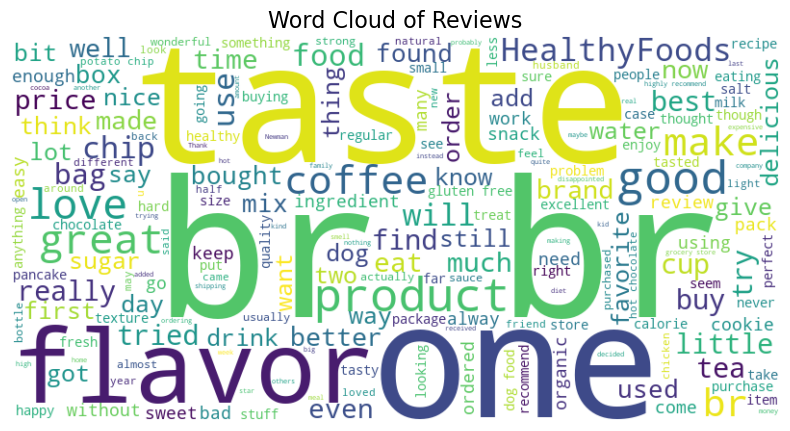

In [70]:
text =" ".join(review for review in df_text.Text)
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800,height=400,
                            background_color='white',
                            colormap='viridis').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews',fontsize=16)
    plt.show
plot_wordcloud(text)

In [71]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [72]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [76]:
smote =SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)

<Axes: xlabel='count', ylabel='Outcome'>

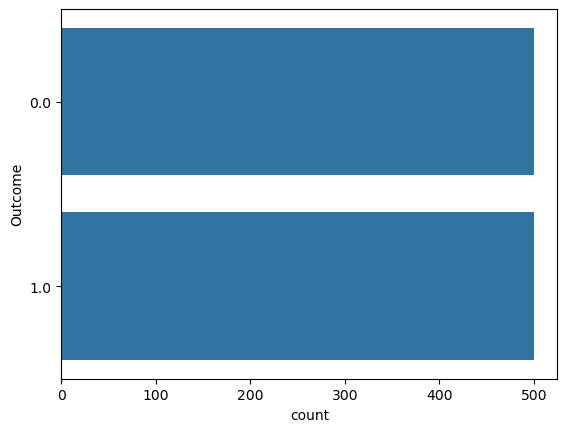

In [78]:
sns.countplot(data=x_resampled,y=y_resampled)

In [88]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])]=scaler.fit_transform(df[df.columns.difference(['Outcome'])])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631558,1.341591,0.161680,0.909160,-0.762150,0.145372,0.509348,0.239937
1,-0.960924,-1.343540,-0.162144,0.525073,-0.762150,0.293760,-0.424792,-0.249485
2,1.268551,1.937542,-0.270085,-1.331350,-0.762150,-1.374123,0.661654,-0.151600
3,-0.960924,-1.209618,-0.162144,0.140986,0.158329,-0.661860,-1.047552,-1.228329
4,-1.279421,0.759031,-1.565378,0.909160,0.882961,1.563963,0.105908,-0.053716
